In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
SAV4 = pd.read_csv('SAV/output/SAV_DataUsed.txt', sep='|')

C:\Users\Hill_T\AppData\Local\Temp\ipykernel_23148\3048008795.py:5: DtypeWarning: Columns (15,17,23) have mixed types. Specify dtype option on import or set low_memory=False.
  SAV4 = pd.read_csv('SAV/output/SAV_DataUsed.txt', sep='|')


In [10]:
p = 'BB_pct'
i = 'Alligator Harbor'
j = 'Syringodium filiforme'

In [3]:
nyears = SAV4[(~SAV4[p].isna()) & (~SAV4['analysisunit'].isna())].groupby(['ManagedAreaName', 'analysisunit']).agg(type=(p, 'first'), nyr=('Year', 'nunique')).reset_index()
nyears2 = SAV4[(~SAV4[p].isna()) & (~SAV4['analysisunit_halid'].isna())].groupby(['ManagedAreaName', 'analysisunit_halid']).agg(type=(p, 'first'), nyr=('Year', 'nunique')).reset_index()
nyears2.rename(columns={'analysisunit_halid': 'analysisunit'}, inplace=True)
nyears = pd.concat([nyears, nyears2]).drop_duplicates()

# ma_include = nyears[nyears['nyr'] >= 5]['ManagedAreaName'].unique()
ma_include = 'Alligator harbor'

In [4]:
ma_halspp = ["Banana River", "Indian River-Malabar to Vero Beach", "Indian River-Vero Beach to Ft. Pierce", "Jensen Beach to Jupiter Inlet",
               "Loxahatchee River-Lake Worth Creek", "Mosquito Lagoon", "Biscayne Bay", "Florida Keys NMS"]

In [5]:
plotdat = SAV4[(SAV4['ManagedAreaName'] == i) & (~SAV4[p].isna())].groupby(['analysisunit_halid', 'Year', 'relyear', p]).size().reset_index(name='npt')

In [6]:
species = plotdat.analysisunit_halid.unique()

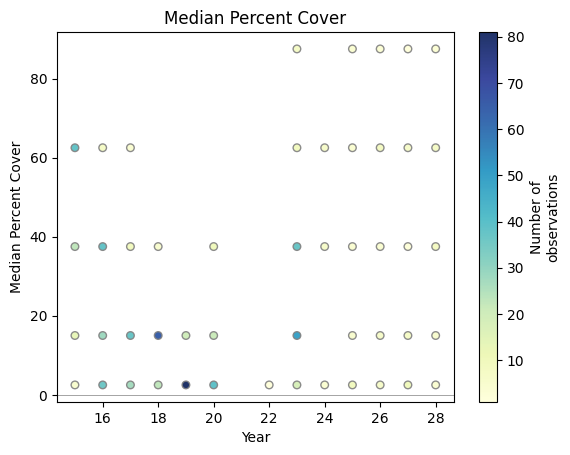

In [11]:
plotdat = plotdat[plotdat.analysisunit_halid==j]

plot_i = plt.scatter(data=plotdat.dropna(subset=[p, 'relyear']), 
                     x='relyear', 
                     y=p, 
                     c='npt', 
                     cmap='YlGnBu', 
                     alpha=0.9, 
                     edgecolors='grey',
                     s=30)

plt.axhline(y=0, color='grey', linewidth=0.5)

plt.title('Median Percent Cover')
plt.xlabel('Year')
plt.ylabel('Median Percent Cover')

# Create colorbar
cbar = plt.colorbar(plot_i)
cbar.set_label('Number of\nobservations')

plt.show()

In [12]:
plotdat = SAV4[(SAV4['ManagedAreaName'] == i) & (~SAV4[p].isna())].groupby(['analysisunit_halid', 'Year', 'relyear', p]).size().reset_index(name='npt')

original R code:

In [9]:
# model_j <- try(lme(formula_j,
#                  random = list(SiteIdentifier = ~relyear),
#                  control = list(msMaxIter = 1000, msMaxEval = 1000, sing.tol=1e-20),
#                  na.action = na.omit,
#                  data = SAV4[ManagedAreaName == i & !is.na(eval(p)) & analysisunit_halid == j, ]), 
#              silent = TRUE)

In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula_j = f"{p} ~ relyear"

n = 1
x = 0

while x < 5:
    if j in set(SAV4['analysisunit_halid']) - set(SAV4['analysisunit']):
        subdata = SAV4[(SAV4['ManagedAreaName'] == i) & (~SAV4[p].isna()) & (SAV4['analysisunit_halid'] == j)]
    else:
        subdata = SAV4[(SAV4['ManagedAreaName'] == i) & (~SAV4[p].isna()) & (SAV4['analysisunit'] == j)]

    model_j = smf.mixedlm(formula_j, data=subdata, groups=subdata['SiteIdentifier']).fit(reml=False)
    
    if model_j.converged:
        break
        
    if x % 25 == 0:
        print(f"Model failed, starting attempt {x+1} of 5")

    n += 1
    x += 1

In [17]:
model_j.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: BB_pct    
No. Observations: 772     Method:             ML        
No. Groups:       26      Scale:              313.2354  
Min. group size:  1       Log-Likelihood:     -3351.1694
Max. group size:  68      Converged:          Yes       
Mean group size:  29.7                                  
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     52.665    6.762  7.789 0.000 39.412 65.918
relyear       -1.338    0.274 -4.883 0.000 -1.875 -0.801
Group Var    273.605    4.795                           
========================================================

"""